# Data import and understanding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("Signal.csv")

In [3]:
df

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# Check for missing values
missing_values = df.isnull()

# Calculate percentage of missing values in each column
percent_missing = missing_values.mean() * 100

# Print percentage of missing values for each column
for column in df.columns:
    print("Percentage of missing values in", column, ":", percent_missing[column], "%")

Percentage of missing values in Parameter 1 : 0.0 %
Percentage of missing values in Parameter 2 : 0.0 %
Percentage of missing values in Parameter 3 : 0.0 %
Percentage of missing values in Parameter 4 : 0.0 %
Percentage of missing values in Parameter 5 : 0.0 %
Percentage of missing values in Parameter 6 : 0.0 %
Percentage of missing values in Parameter 7 : 0.0 %
Percentage of missing values in Parameter 8 : 0.0 %
Percentage of missing values in Parameter 9 : 0.0 %
Percentage of missing values in Parameter 10 : 0.0 %
Percentage of missing values in Parameter 11 : 0.0 %
Percentage of missing values in Signal_Strength : 0.0 %


In [5]:
# Check for duplicate records
duplicate_rows = df.duplicated()

# Count the number of duplicate records
num_duplicate_rows = duplicate_rows.sum()

# Print the number of duplicate records
print("Number of duplicate records:", num_duplicate_rows)

Number of duplicate records: 240


In [6]:
# Remove duplicate records
df = df.drop_duplicates()

# Print the number of remaining rows
print("Number of rows after removing duplicates:", len(df))

Number of rows after removing duplicates: 1359


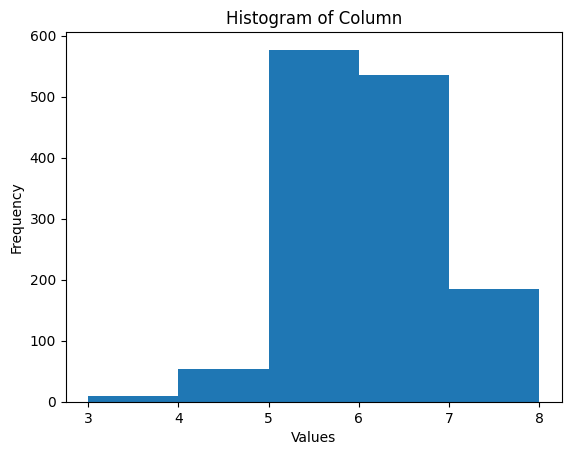

In [7]:
plt.hist(df['Signal_Strength'], bins=5)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column')
plt.show()

### Data analysis
We found through our analysis that most combinations of the parameters are reliable enough to determine a stable signal strength. 

# Part 2

In [8]:
# Split the data into X and Y
# Select all columns except the last one
X = df.iloc[:, :-1]
# Select the last column
Y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (951, 11)
Y_train shape: (951,)
X_test shape: (408, 11)
Y_test shape: (408,)


The test and train data are in sync

In [9]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the train data and transform both train and test data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [10]:
num_unique = df['Signal_Strength'].unique()

# print the result
print(num_unique)

[5 6 7 4 8 3]


In [11]:
# create dataframes for Y_train and Y_test
df_Y_train = pd.DataFrame({'Y': Y_train})
df_Y_test = pd.DataFrame({'Y': Y_test})

# initialize one-hot encoder object
encoder = OneHotEncoder()

# fit the encoder on combined data
encoder.fit(pd.concat([df_Y_train, df_Y_test]))

# transform Y_train and Y_test using the fitted encoder
Y_train_hot = encoder.transform(df_Y_train).toarray()
Y_test_hot = encoder.transform(df_Y_test).toarray()

# print the encoded arrays
print('Encoded Y_train:')
print(Y_train_hot)

print('Encoded Y_test:')
print(Y_test_hot)


Encoded Y_train:
[[0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
Encoded Y_test:
[[0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [12]:
# Part 3 : Model training and evalutation
# Desgin a neural network model to predict the signal strength
import keras.api._v2.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import HeUniform


In [13]:
# Create the model
model = Sequential()

# Intialize weights using HeUniform initializer
initializer = HeUniform()

# Add the first hidden layer
model.add(Dense(256, activation='relu', kernel_initializer=initializer,
          input_shape=(X_train_normalized.shape[1],)))

# Add the second hidden layer
model.add(Dense(128, activation='relu', kernel_initializer=initializer))

# Add the output layer
model.add(Dense(6, activation='softmax', kernel_initializer=initializer))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 6)                 774       
                                                                 
Total params: 36,742
Trainable params: 36,742
Non-trainable params: 0
_________________________________________________________________


c:\Users\jayan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [14]:
# Train the model
history = model.fit(X_train_normalized, Y_train_hot,
                    epochs=100, batch_size=32, validation_split=0.2)

#


Epoch 1/100
24/24 [==============================] - 1s 7ms/step - loss: 1.4783 - accuracy: 0.4658 - val_loss: 1.1005 - val_accuracy: 0.5654
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0408 - accuracy: 0.5829 - val_loss: 1.0902 - val_accuracy: 0.6021
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9529 - accuracy: 0.6184 - val_loss: 1.1182 - val_accuracy: 0.6021
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9011 - accuracy: 0.6447 - val_loss: 1.1637 - val_accuracy: 0.5812
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8815 - accuracy: 0.6368 - val_loss: 1.1711 - val_accuracy: 0.5812
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8404 - accuracy: 0.6474 - val_loss: 1.1555 - val_accuracy: 0.5916
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7933 - accuracy: 0.6579 - val_loss: 1.1297 - val_accuracy: 0.5969
Epoch 8/100
2

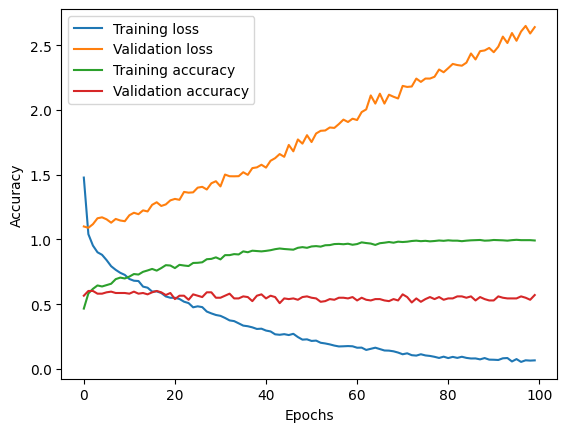

In [15]:


# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()





In [16]:
# Design a new model for the same problem and better accuracy

# Create the model
model = Sequential()

# Intialize weights using HeUniform initializer
initializer = HeUniform()

# Add the first hidden layer
model.add(Dense(256, activation='relu', kernel_initializer=initializer,
          input_shape=(X_train_normalized.shape[1],)))

# Add the second hidden layer
model.add(Dense(128, activation='relu', kernel_initializer=initializer))

# Add the third hidden layer
model.add(Dense(64, activation='relu', kernel_initializer=initializer))

# Add the fourth hidden layer
model.add(Dense(36, activation='relu', kernel_initializer=initializer))

# Add the output layer
model.add(Dense(6, activation='softmax', kernel_initializer=initializer))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               3072      
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 36)                2340      
                                                                 
 dense_7 (Dense)             (None, 6)                 222       
                                                                 
Total params: 46,786
Trainable params: 46,786
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Train the model
history = model.fit(X_train_normalized, Y_train_hot,
                    epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
24/24 [==============================] - 1s 7ms/step - loss: 1.3752 - accuracy: 0.4829 - val_loss: 1.1084 - val_accuracy: 0.5550
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0444 - accuracy: 0.5605 - val_loss: 1.0744 - val_accuracy: 0.5445
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9654 - accuracy: 0.6118 - val_loss: 1.0777 - val_accuracy: 0.5445
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8957 - accuracy: 0.6382 - val_loss: 1.0895 - val_accuracy: 0.5445
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8639 - accuracy: 0.6355 - val_loss: 1.0812 - val_accuracy: 0.5602
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8290 - accuracy: 0.6671 - val_loss: 1.0791 - val_accuracy: 0.5916
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7754 - accuracy: 0.6921 - val_loss: 1.1510 - val_accuracy: 0.5654
Epoch 8/100
2

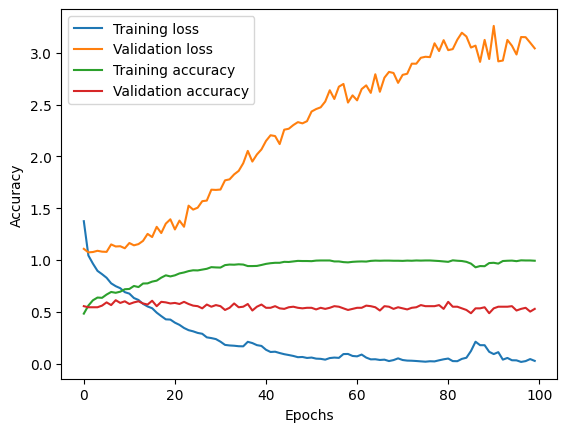

In [18]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


Conclusions:

1. We can see validation loss increasing more rapidly here in this model. Assuming the cause of this could be that this model has more hidden layers and adding extra layers cn contribute to validation loss.
   